Text(0.5, 1.0, 'sensitivity of Unmatched SV pipeline, n=995')

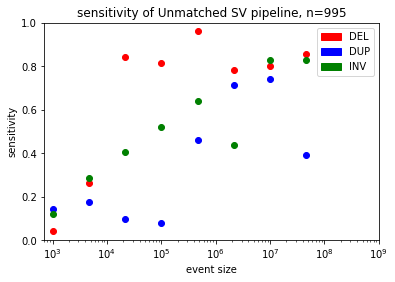

In [3]:
import pandas as pd
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

sizes = [int(i) for i in numpy.logspace(3, 9, num=10)]
color = {'DEL': 'red', 'DUP': 'blue', 'INV': 'green'}
files = {
    'DEL': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv",
    'DUP': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv",
    'INV': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv",
}

total_calls = 0
for key, file in files.items():

    raw_df = pd.read_csv(file, sep='\t')
    total_calls += len(raw_df)

    sens = len(raw_df[raw_df['Detection']=='Detected']) / len(raw_df)
    raw_df['binned'] = pd.cut(raw_df['SV length'], sizes)
    bins = raw_df['binned'].unique()
    for bin in bins:
        df = raw_df[raw_df['binned']==bin]
        gb = df.groupby('Sample')
        for name, group in gb:
            if len(group) >= 5:
                sens = len(group[group['Detection']=='Detected']) / len(group)
#                 plt.scatter(bin.left, sens, color=color[key], alpha=0.3)
        if len(df) >=5 :
            sens = len(df[df['Detection']=='Detected']) / len(df)
            plt.scatter(bin.left, sens, color=color[key])
    plt.xscale('log')
    plt.xlim(sizes[0]*0.7, sizes[-1])
    plt.ylim(0,1)
    plt.xlabel("event size")
    plt.ylabel("sensitivity")
    plt.title("")
    
color_handles = []
for key, value in color.items():
    color_handles.append(
        mpatches.Patch(color=value,label=key)
    )
plt.legend(handles=color_handles)
plt.title(f'sensitivity of Unmatched SV pipeline, n={total_calls}')

Text(0.5, 0.98, 'sensitivity of Unmatched SV pipeline, n=995')

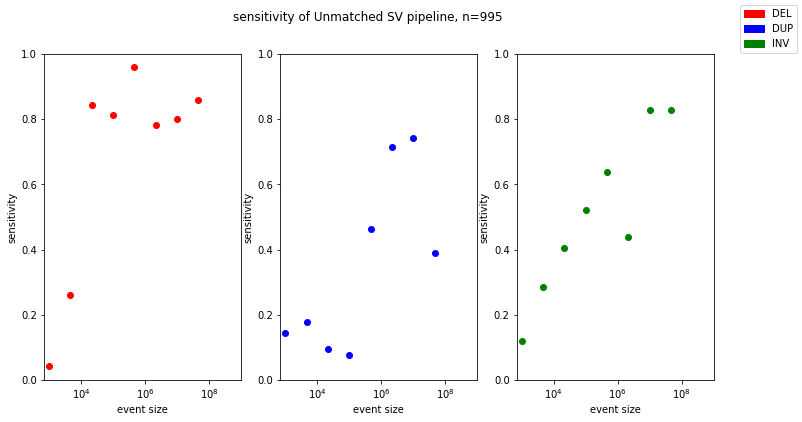

In [106]:

sizes = [int(i) for i in numpy.logspace(3, 9, num=10)]
color = {'DEL': 'red', 'DUP': 'blue', 'INV': 'green'}
files = {
    'DEL': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv",
    'DUP': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv",
    'INV': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv",
}

fig, ax = plt.subplots(1, 3, figsize=(12,6))


total_calls = 0
for i, (key, file) in enumerate(files.items()):

    raw_df = pd.read_csv(file, sep='\t')
    total_calls += len(raw_df)

    sens = len(raw_df[raw_df['Detection']=='Detected']) / len(raw_df)
    raw_df['binned'] = pd.cut(raw_df['SV length'], sizes)
    bins = raw_df['binned'].unique()
    for bin in bins:
        df = raw_df[raw_df['binned']==bin]
        gb = df.groupby('Sample')
        for name, group in gb:
            if len(group) >= 2:
                sens = len(group[group['Detection']=='Detected']) / len(group)
#                 ax[i].scatter(bin.left, sens, color=color[key], alpha=0.2)
        if len(df) >=3 :
            sens = len(df[df['Detection']=='Detected']) / len(df)
            ax[i].scatter(bin.left, sens, color=color[key])
    ax[i].set_xscale('log')
    ax[i].set_xlim([sizes[0]*0.7, sizes[-1]])
    ax[i].set_ylim([0,1])
    ax[i].set_xlabel("event size")
    ax[i].set_ylabel("sensitivity")
    
color_handles = []
for key, value in color.items():
    color_handles.append(
        mpatches.Patch(color=value,label=key)
    )
fig.legend(handles=color_handles)
fig.suptitle(f'sensitivity of Unmatched SV pipeline, n={total_calls}')

Text(0.5, 0.98, 'sensitivity of Unmatched SV pipeline, n=995')

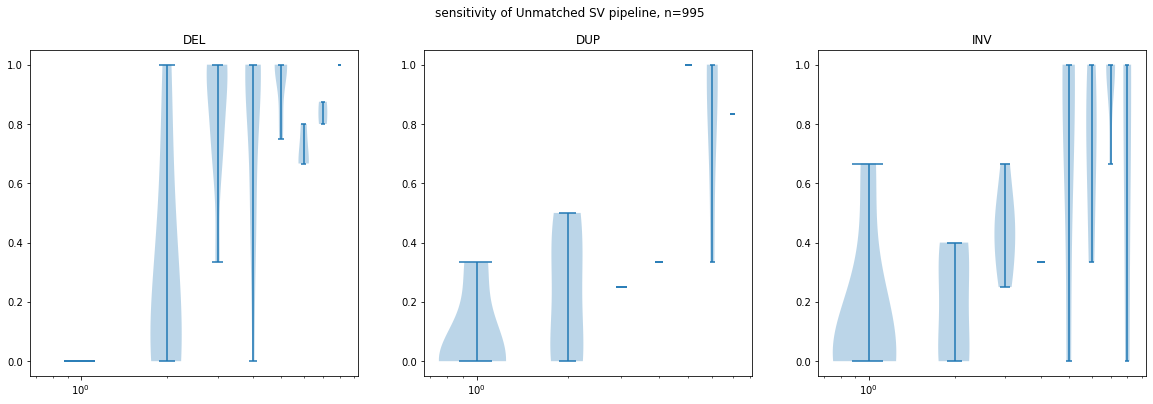

In [101]:
sizes = [int(i) for i in numpy.logspace(3, 9, num=10)]
color = {'DEL': 'red', 'DUP': 'blue', 'INV': 'green'}
files = {
    'DEL': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv",
    'DUP': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv",
    'INV': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv",
}


results = {
    "DEL": {k:[] for k in sizes},
    "DUP": {k:[] for k in sizes},
    "INV": {k:[] for k in sizes},
}

fig, ax = plt.subplots(1, 3, figsize=(20,6))

total_calls = 0
for i, (key, file) in enumerate(files.items()):

    raw_df = pd.read_csv(file, sep='\t')
    total_calls += len(raw_df)

    sens = len(raw_df[raw_df['Detection']=='Detected']) / len(raw_df)
    raw_df['binned'] = pd.cut(raw_df['SV length'], sizes)
    bins = raw_df['binned'].unique()
    for bin in bins:
        df = raw_df[raw_df['binned']==bin]
        gb = df.groupby('Sample')
        for name, group in gb:
            if len(group) >= 3:
                sens = len(group[group['Detection']=='Detected']) / len(group)
                results[key][bin.left].append(sens)
#         if len(df) >=5 :
#             sens = len(df[df['Detection']=='Detected']) / len(df)
#             ax[i].scatter(bin.left, sens, color=color[key])
#     ax[i].set_xscale('log')
#     ax[i].set_xlim([sizes[0]*0.7, sizes[-1]])
#     ax[i].set_ylim([0,1])
#     ax[i].set_xlabel("event size")
#     ax[i].set_ylabel("sensitivity")

for i, (key, value) in enumerate(results.items()):
    ls = []
    for bin, l in value.items():
        ls.append(l)
    ls = [i for i in ls if i]
    ax[i].violinplot(ls)
    ax[i]
#     ax[i].boxplot(ls, positions=sizes, widths=sizes)
    ax[i].set_xscale('log')
    ax[i].title.set_text(key)


fig.suptitle(f'sensitivity of Unmatched SV pipeline, n={total_calls}')

In [102]:
for i in ls:
    print(i)

[0.25, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0]
[0.4, 0.3333333333333333, 0.0, 0.0]
[0.4, 0.3333333333333333, 0.25, 0.6666666666666666, 0.5, 0.5]
[0.3333333333333333]
[1.0, 0.8333333333333334, 0.0, 1.0]
[1.0, 0.6666666666666666, 0.3333333333333333, 0.8333333333333334]
[1.0, 1.0, 0.6666666666666666, 1.0, 1.0]
[1.0, 1.0, 0.0]


In [10]:
bins

[(21544.0, 100000.0], (100000.0, 464158.0], (1000.0, 4641.0], (464158.0, 2154434.0], (2154434.0, 10000000.0], (4641.0, 21544.0], (10000000.0, 46415888.0], NaN, (46415888.0, 215443469.0]]
Categories (8, interval[int64]): [(1000, 4641] < (4641, 21544] < (21544, 100000] < (100000, 464158] < (464158, 2154434] < (2154434, 10000000] < (10000000, 46415888] < (46415888, 215443469]]

In [118]:
import isabl_cli as ii
samples = [
    "I-H-133674-N1-1-D1-1",
    "I-H-134756-N1-1-D1-1",
    "I-H-134753-N1-1-D1-1",
    "I-H-134754-N1-1-D1-1",
    "I-H-134755-N1-1-D1-1",
    "I-H-134202-N1-1-D1-1",
    "I-H-134757-N1-1-D1-1",
    "I-H-135073-N1-1-D1-1",
    "I-H-135074-N1-1-D1-1",
    "I-H-135076-N1-1-D1-1",
    "I-H-133676-N1-2-D1-1",
    "I-H-135081-N1-1-D1-1",
    "I-H-135082-N1-1-D1-1",
    "I-H-134769-N1-1-D1-1",
    "I-H-134768-N1-1-D1-1",
    "I-H-135387-N1-1-D1-1",
    "I-H-135421-N1-1-D1-1",
    "I-H-135462-N1-1-D1-1",
    "I-H-135463-N1-1-D1-1",
    "I-H-135420-N1-1-D1-1",
    "I-H-134733-N3-1-D1-1",
    "I-H-135963-N1-1-D1-1",
    "I-H-135467-N1-1-D1-1",
    "I-H-135457-N1-1-D1-1",
    "I-H-108333-N2-1-D1-1",
    "I-H-135459-N1-1-D1-1",
    "I-H-135466-N1-1-D1-1",
    "I-H-135965-N1-1-D1-1",
    "I-H-135967-N1-1-D1-1",
    "I-H-135973-N1-1-D1-1",
    "I-H-135988-N1-1-D1-1",
    "I-H-135990-N1-1-D1-1",
    "I-H-136024-N1-1-D1-1",
    "I-H-136062-N1-1-D1-1",
    "I-H-136086-N1-1-D1-1",
    "I-H-136087-N1-1-D1-1",
    "I-H-135089-N1-1-D1-1",
    "I-H-136134-N1-1-D1-1",
    "I-H-136136-N1-1-D1-1",
    "I-H-136083-N1-1-D1-1",
    "I-H-136139-N1-1-D1-1",
    "I-H-136374-N1-1-D1-1",
    "I-H-136375-N1-1-D1-1",
    "I-H-136424-N1-1-D1-1",
    "I-H-136425-N1-1-D1-1",
    "I-H-136428-N1-1-D1-1",
    "I-H-136429-N1-1-D1-1",
    "I-H-135088-N1-1-D1-1",
    "I-H-136436-N1-1-D1-1",
    "I-H-136438-N1-1-D1-1",
    "I-H-136609-N1-1-D1-1",
    "IID_H136631_N01_01_WG01",
    "IID_H136632_N01_01_WG01",
    "IID_H136633_N01_01_WG01",
    "IID_H136640_N01_01_WG01",
    "IID_H136641_N01_01_WG01",
    "IID_H136648_N01_01_WG01",
    "IID_H136649_N01_01_WG01",
    "IID_H156379_N01_01_WG01",
    "IID_H156407_N01_01_WG01",
    "IID_H156409_N01_01_WG01",
    "IID_H156416_N01_01_WG01",
    "IID_H136433_N02_01_WG01",
    "IID_H156418_N01_01_WG01",
    "IID_H156421_N01_01_WG01",
    "IID_H156421_N02_01_WG01",
    "IID_H156423_N01_01_WG01",
]

for i in samples:
    print(ii.get_experiments(system_id=i)[0].bam_files.GRCh37.url)

Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/14/162514/I-H-133674-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/22/162522/I-H-134756-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/23/162523/I-H-134753-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/24/162524/I-H-134754-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/25/162525/I-H-134755-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/26/162526/I-H-134202-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/25/27/162527/I-H-134757-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/29/96/162996/I-H-135073-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/29/97/162997/I-H-135074-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/30/00/163000/I-H-135076-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/30/19/163019/I-H-133676-N1-2-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/30/96/163096/I-H-135081-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/30/97/163097/I-H-135082-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/31/06/163106/I-H-134769-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/31/07/163107/I-H-134768-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/32/73/163273/I-H-135387-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/34/05/163405/I-H-135421-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/34/42/163442/I-H-135462-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/34/43/163443/I-H-135463-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/34/45/163445/I-H-135420-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/57/163857/I-H-134733-N3-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/58/163858/I-H-135963-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/59/163859/I-H-135467-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...
Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/62/163862/I-H-135457-N1-1-D1-1.bam
/work/isabl/data/analyses/38/63/163863/I-H-108333-N2-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/65/163865/I-H-135459-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/68/163868/I-H-135466-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/69/163869/I-H-135965-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/88/163888/I-H-135967-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/89/163889/I-H-135973-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/94/163894/I-H-135988-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/97/163897/I-H-135990-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/07/163907/I-H-136024-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/10/163910/I-H-136062-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/57/163957/I-H-136086-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/59/163959/I-H-136087-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/86/163986/I-H-135089-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/87/163987/I-H-136134-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/88/163988/I-H-136136-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/90/163990/I-H-136083-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/39/92/163992/I-H-136139-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/41/10/164110/I-H-136374-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/41/12/164112/I-H-136375-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/62/93/166293/I-H-136424-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/62/95/166295/I-H-136425-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/62/99/166299/I-H-136428-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/63/02/166302/I-H-136429-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/65/77/166577/I-H-135088-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/65/79/166579/I-H-136436-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/65/80/166580/I-H-136438-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/85/173785/I-H-136609-N1-1-D1-1.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/87/173787/IID_H136631_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/89/173789/IID_H136632_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/91/173791/IID_H136633_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/06/173806/IID_H136640_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/38/08/173808/IID_H136641_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/93/173793/IID_H136648_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/95/173795/IID_H136649_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/81/13/208113/IID_H156379_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/98/88/219888/IID_H156407_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/41/27/224127/IID_H156409_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/41/29/224129/IID_H156416_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/41/31/224131/IID_H136433_N02_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/40/95/224095/IID_H156418_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/98/99/219899/IID_H156421_N01_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/98/93/219893/IID_H156421_N02_01_WG01.bam


Retrieving 1 from experiments API endpoint...


/work/isabl/data/analyses/37/69/223769/IID_H156423_N01_01_WG01.bam
